In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
from PIL import Image, ImageOps
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Activation,Dropout,Flatten,Dense
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
import keras
import cv2

In [2]:
path="../input/utkface-new/UTKFace"
files=os.listdir(path)
size=len(files)
print(size)

23708


In [3]:
images = []
ages = []
genders = []

for i in files:
    split = i.split('_')
    ages.append(int(split[0]))
    genders.append(int(split[1]))
    images.append(Image.open('../input/utkface-new/UTKFace/' + i))

In [4]:
images = pd.Series(list(images), name = 'Images')
ages = pd.Series(list(ages), name = 'Ages')
genders = pd.Series(list(genders), name = 'Genders')

df = pd.concat([images, ages, genders], axis=1)
df

,Images,Ages,Genders
0,<PIL.JpegImagePlugin.JpegImageFile image mode=...,26,0
1,<PIL.JpegImagePlugin.JpegImageFile image mode=...,22,1
2,<PIL.JpegImagePlugin.JpegImageFile image mode=...,21,1
3,<PIL.JpegImagePlugin.JpegImageFile image mode=...,28,0
4,<PIL.JpegImagePlugin.JpegImageFile image mode=...,17,1
...,...,...,...
23703,<PIL.JpegImagePlugin.JpegImageFile image mode=...,41,0
23704,<PIL.JpegImagePlugin.JpegImageFile image mode=...,42,0
23705,<PIL.JpegImagePlugin.JpegImageFile image mode=...,2,0
23706,<PIL.JpegImagePlugin.JpegImageFile image mode=...,65,1


## Visualizing Data

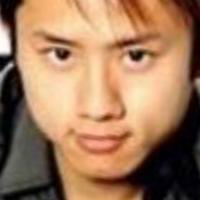

26 0


In [5]:
display(df['Images'][0])
print(df['Ages'][0], df['Genders'][0])

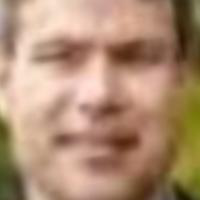

45 0


In [6]:
display(df['Images'][2000])
print(df['Ages'][2000], df['Genders'][2000])

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Ages', ylabel='Density'>

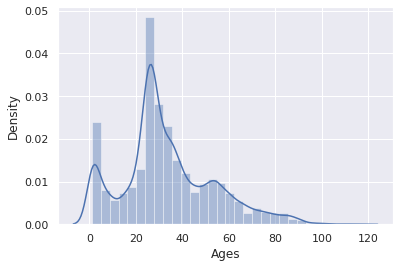

In [7]:
sns.set_theme()
sns.distplot(df["Ages"],kde=True,bins=30)

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Ages', ylabel='Density'>

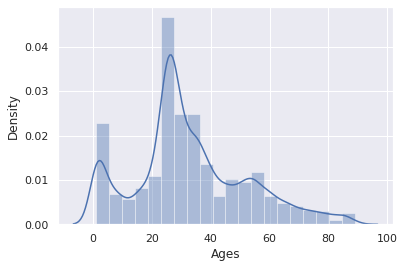

In [8]:
df = df[df['Ages'] < 90]
sns.distplot(df['Ages'],kde=True, bins=20)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(0.0, 14000.0)

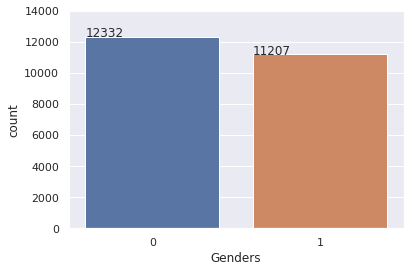

In [9]:
from decimal import Decimal
ax=sns.countplot(df['Genders'])
for p in ax.patches:
    ax.annotate('{}'.format(Decimal(str(p.get_height()))), (p.get_x(), p.get_height()))
plt.ylim(0,14000)

## preprocessing

In [10]:
x = []
y = []

for i in range(len(df)):
    df['Images'].iloc[i] = df['Images'].iloc[i].resize((64,64), Image.ANTIALIAS)
    ar = np.asarray(df['Images'].iloc[i])
    x.append(ar)
    agegen = [int(df['Ages'].iloc[i]), int(df['Genders'].iloc[i])]
    y.append(agegen)
x = np.array(x)

/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:692: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


## train test split

In [11]:
y_age = df['Ages']
y_gender = df['Genders']

x_train_age, x_test_age, y_train_age, y_test_age = train_test_split(x, y_age, test_size=0.2, stratify=y_age)
x_train_gender, x_test_gender, y_train_gender, y_test_gender = train_test_split(x, y_gender, test_size=0.2, stratify=y_gender)

In [12]:
print(x.shape)
print(x_train_age.shape)
print(x_train_gender.shape)

(23539, 64, 64, 3)
(18831, 64, 64, 3)
(18831, 64, 64, 3)


## model creation

#### age model

In [13]:
agemodel1 = Sequential([
        Conv2D(32, (3,3), activation='relu', input_shape=(64,64, 3)),
        MaxPooling2D((2,2)),

        Conv2D(64, (3,3), activation='relu'),
        MaxPooling2D((2,2)),

        Conv2D(64, (3,3), activation='relu'),
        MaxPooling2D((2,2)),

        Conv2D(128, (3,3), activation='relu'),
        MaxPooling2D((2,2)),

        Flatten(),
        Flatten(),
        Dense(64, activation='relu'),
        Dropout(0.3),
        Dense(32,activation='relu'),
        Dropout(0.4),
        Dense(2, activation='relu')
])


In [14]:
agemodel1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 4, 128)         7

In [24]:
agemodel1.compile(loss='mse',optimizer=optimizers.Adam(lr=0.001),metrics=['accuracy'])

In [16]:
datagen = ImageDataGenerator(
      rescale=1./255., width_shift_range = 0.1, height_shift_range = 0.1, horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale=1./255)

train1 = datagen.flow(x_train_age, y_train_age, batch_size=32)

test1 = test_datagen.flow(
        x_test_age, y_test_age,
        batch_size=32)

history1 = agemodel1.fit(train1, epochs=50, shuffle=True, validation_data=test1)

Epoch 1/50
589/589 [==============================] - 74s 125ms/step - loss: 645.9587 - accuracy: 0.0185 - val_loss: 359.7690 - val_accuracy: 0.0478
Epoch 2/50
589/589 [==============================] - 72s 123ms/step - loss: 438.5909 - accuracy: 0.0217 - val_loss: 238.9701 - val_accuracy: 0.0478
Epoch 3/50
589/589 [==============================] - 73s 123ms/step - loss: 336.3938 - accuracy: 0.0242 - val_loss: 243.0854 - val_accuracy: 0.0187
Epoch 4/50
589/589 [==============================] - 72s 123ms/step - loss: 285.3860 - accuracy: 0.0244 - val_loss: 227.7406 - val_accuracy: 0.0249
Epoch 5/50
589/589 [==============================] - 83s 141ms/step - loss: 256.0117 - accuracy: 0.0220 - val_loss: 167.3282 - val_accuracy: 0.0397
Epoch 6/50
589/589 [==============================] - 72s 123ms/step - loss: 219.3993 - accuracy: 0.0237 - val_loss: 151.3888 - val_accuracy: 0.0157
Epoch 7/50
589/589 [==============================] - 73s 124ms/step - loss: 209.5109 - accuracy: 0.0155 -

In [17]:
agemodel1.save("agemodel1.model", save_format="h5")

In [18]:
agemodel1.save("agemodel1.h5")

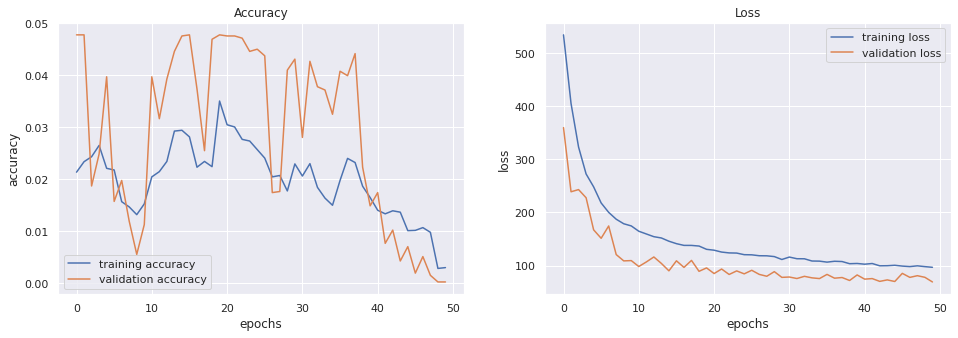

In [25]:
import matplotlib.gridspec as gridspec

fig = plt.figure(figsize=(16,5))
grid = gridspec.GridSpec(ncols=2,nrows=1,figure=fig)
fig.add_subplot(grid[0])
plt.plot(history1.history['accuracy'], label='training accuracy')
plt.plot(history1.history['val_accuracy'], label='validation accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

fig.add_subplot(grid[1])
plt.plot(history1.history['loss'], label='training loss')
plt.plot(history1.history['val_loss'], label='validation loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.savefig('agemodel1-accuracy-loss.jpg')

In [76]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
agemodel1.evaluate(x_test_age, y_test_age, verbose=2)
predict = (agemodel1.predict(x_test_age) > 0.5).astype("int32")
print(classification_report(y_test_age,predict))
#print(confusion_matrix(test_target,predict))
#testtgt = np.argmax(y_test_age,axis = 1)
#pred = np.argmax(predict,axis = 1)
print(confusion_matrix(y_test_age,predict))

148/148 - 4s - loss: -4.3373e+02 - accuracy: 2.1240e-04


ValueError: Classification metrics can't handle a mix of multiclass and multilabel-indicator targets

In [32]:
print('Accuracy:', accuracy_score(y_test_age,predict))

ValueError: Classification metrics can't handle a mix of multiclass and multilabel-indicator targets

In [77]:
from sklearn import metrics
y_pred_proba = agemodel1.predict_proba(x_test_age)
#y_pred_proba=np.argmax(y_pred_proba,axis = 1)
#test_target=np.argmax(y_test_age,axis=1)
fpr, tpr, threshold = metrics.roc_curve(y_test_age, y_pred_proba)
roc_auc = metrics.auc(fpr, tpr)
roc_auc

/opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


ValueError: multiclass format is not supported

In [ ]:
def plot_roc_cur(fper, tper):  
    plt.plot(fper, tper, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

plot_roc_cur(fpr, tpr)

#### gender model

In [56]:
genmodel2 = Sequential([
        Conv2D(32, (3,3), activation='relu', input_shape=(64,64, 3)),
        MaxPooling2D((2,2)),

        Conv2D(64, (3,3), activation='relu'),
        MaxPooling2D((2,2)),

        Conv2D(64, (3,3), activation='relu'),
        MaxPooling2D((2,2)),

        Conv2D(128, (3,3), activation='relu'),
        MaxPooling2D((2,2)),

        Flatten(),
        Flatten(),
        Dense(64, activation='relu'),
        Dropout(0.3),
        Dense(32,activation='relu'),
        Dropout(0.4),
        Dense(1, activation='sigmoid')
])


In [57]:
genmodel2.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 29, 29, 64)        18496     
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 12, 12, 64)        36928     
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 4, 4, 128)        

In [58]:
genmodel2.compile(loss='binary_crossentropy',optimizer=optimizers.Adam(lr=0.001),metrics=['accuracy'])

In [60]:
datagen = ImageDataGenerator(
      rescale=1./255., width_shift_range = 0.1, height_shift_range = 0.1, horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale=1./255)

train2 = datagen.flow(x_train_gender, y_train_gender, batch_size=32)

test2 = test_datagen.flow(
        x_test_gender, y_test_gender,
        batch_size=32)

history2 =genmodel2.fit(train2, epochs=50, shuffle=True, validation_data=test2)

Epoch 1/50
589/589 [==============================] - 78s 131ms/step - loss: 0.6628 - accuracy: 0.5835 - val_loss: 0.4592 - val_accuracy: 0.7914
Epoch 2/50
589/589 [==============================] - 72s 123ms/step - loss: 0.4558 - accuracy: 0.7968 - val_loss: 0.3692 - val_accuracy: 0.8301
Epoch 3/50
589/589 [==============================] - 72s 122ms/step - loss: 0.3937 - accuracy: 0.8289 - val_loss: 0.3407 - val_accuracy: 0.8520
Epoch 4/50
589/589 [==============================] - 72s 123ms/step - loss: 0.3631 - accuracy: 0.8427 - val_loss: 0.3303 - val_accuracy: 0.8568
Epoch 5/50
589/589 [==============================] - 71s 121ms/step - loss: 0.3450 - accuracy: 0.8501 - val_loss: 0.3208 - val_accuracy: 0.8581
Epoch 6/50
589/589 [==============================] - 71s 121ms/step - loss: 0.3212 - accuracy: 0.8655 - val_loss: 0.3001 - val_accuracy: 0.8738
Epoch 7/50
589/589 [==============================] - 71s 121ms/step - loss: 0.3170 - accuracy: 0.8613 - val_loss: 0.2832 - val_ac

In [61]:
genmodel2.save("genmodel2.model", save_format="h5")

In [62]:
genmodel2.save("genmodel2.h5")

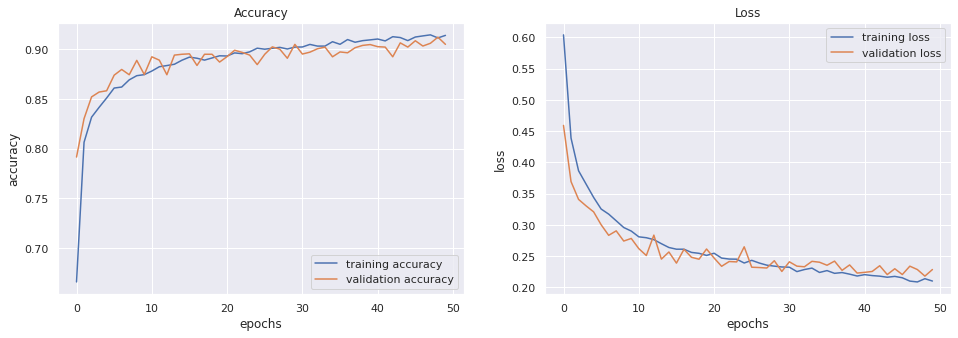

In [64]:
import matplotlib.gridspec as gridspec

fig = plt.figure(figsize=(16,5))
grid = gridspec.GridSpec(ncols=2,nrows=1,figure=fig)
fig.add_subplot(grid[0])
plt.plot(history2.history['accuracy'], label='training accuracy')
plt.plot(history2.history['val_accuracy'], label='validation accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

fig.add_subplot(grid[1])
plt.plot(history2.history['loss'], label='training loss')
plt.plot(history2.history['val_loss'], label='validation loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.savefig('genmodel2-accuracy-loss.jpg')

In [75]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
genmodel2.evaluate(x_test_gender, y_test_gender, verbose=2)
predict = (genmodel2.predict(x_test_gender) > 0.5).astype("int32")
print(classification_report(y_test_gender,predict))
#print(confusion_matrix(test_target,predict))
#testtgt = np.argmax(y_test_gender,axis = 1)
#pred = np.argmax(predict,axis = 1)
print(confusion_matrix(y_test_gender,predict))

148/148 - 4s - loss: 17.3591 - accuracy: 0.8872
              precision    recall  f1-score   support

           0       0.86      0.93      0.90      2467
           1       0.92      0.84      0.88      2241

    accuracy                           0.89      4708
   macro avg       0.89      0.89      0.89      4708
weighted avg       0.89      0.89      0.89      4708

[[2295  172]
 [ 359 1882]]


In [66]:
print('Accuracy:', accuracy_score(y_test_gender,predict))

Accuracy: 0.887213254035684


In [71]:
from sklearn import metrics
y_pred_proba = genmodel2.predict_proba(x_test_gender)
#y_pred_proba=np.argmax(y_pred_proba,axis = 1)
#test_target=np.argmax(y_test_gender,axis=1)
fpr, tpr, threshold = metrics.roc_curve(y_test_gender, y_pred_proba)
roc_auc = metrics.auc(fpr, tpr)
roc_auc

/opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


0.924459898776297

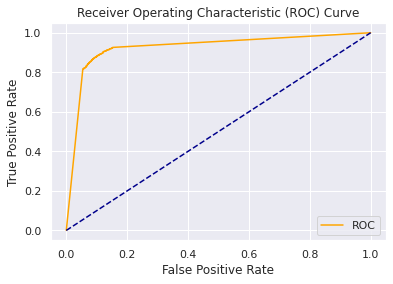

<Figure size 432x288 with 0 Axes>

In [73]:
def plot_roc_cur(fper, tper):  
    plt.plot(fper, tper, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

plot_roc_cur(fpr, tpr)
plt.savefig('genmodel2_roc.jpg')